In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [62]:
with open("mergedefense.json", "r", encoding="utf-8") as file:
    data = json.load(file)

data = data["AlphaPlayTestData"]
data

{'-OKxYwgWjrlJyJP8_ct3': {'damageFromBurningTower': 26980,
  'damageFromSlowTower': 0,
  'damageFromTankTower': 6486,
  'mergeCount': 12,
  'playerTime': '92',
  'score': 26170},
 '-OKx_1XTq9RViqMS8kOP': {'damageFromBurningTower': 209460,
  'damageFromSlowTower': 0,
  'damageFromTankTower': 62545.46,
  'mergeCount': 38,
  'playerTime': '284',
  'score': 246050},
 '-OKzBpRwqVCjTCIXRn93': {'damageFromBurningTower': 0,
  'damageFromSlowTower': 0,
  'damageFromTankTower': 0,
  'mergeCount': 0,
  'playerTime': '27',
  'score': 0},
 '-OKzCzFyRVY6TfON4MOj': {'damageFromBurningTower': 67760,
  'damageFromSlowTower': 0,
  'damageFromTankTower': 68050,
  'mergeCount': 0,
  'playerTime': '205',
  'score': 122260},
 '-OL2EaJWmPWcZxqOaYUa': {'damageFromBurningTower': 0,
  'damageFromSlowTower': 0,
  'damageFromTankTower': 1100,
  'mergeCount': 0,
  'playerTime': '37',
  'score': 720},
 '-OL2EhuFygZx-MRDcn6V': {'damageFromBurningTower': 0,
  'damageFromSlowTower': 0,
  'damageFromTankTower': 0,
  'm

In [63]:
damageFromBurningTower = 0
damageFromTankTower = 0
playerTimeList = []
scoreList = []
mergeCountList = []
for key, value in data.items():
    if value["score"] != 0 and value["mergeCount"] != 0 and float(value["playerTime"]) < 480:
        damageFromBurningTower += value["damageFromBurningTower"]
        damageFromTankTower += value["damageFromTankTower"]
        playerTimeList.append(float(value["playerTime"]))
        mergeCountList.append(value["mergeCount"])
        scoreList.append(value["score"])

damageFromBurningTower: 3147560 damageFromTankTower: 1296893.0869999998


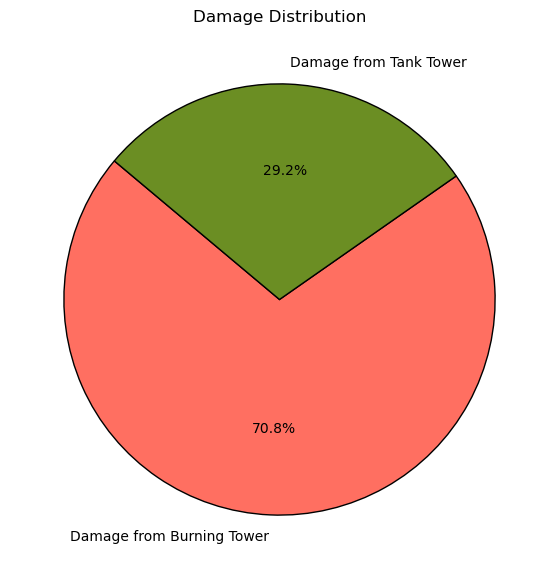

In [64]:
print("damageFromBurningTower:", damageFromBurningTower, "damageFromTankTower:", damageFromTankTower)
labels = ["Damage from Burning Tower", "Damage from Tank Tower"]
values = [damageFromBurningTower, damageFromTankTower]
colors = ["#FF6F61", "#6B8E23"]  # 颜色自定义
plt.figure(figsize=(7, 7))
plt.pie(values, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140, wedgeprops={"edgecolor": "black"})
plt.title("Damage Distribution")
plt.show()

Player Survival Time Analysis
count     36.000000
mean     192.923894
std       93.130238
min       43.000000
25%      127.380325
50%      169.439500
75%      242.637725
max      405.848300
dtype: float64


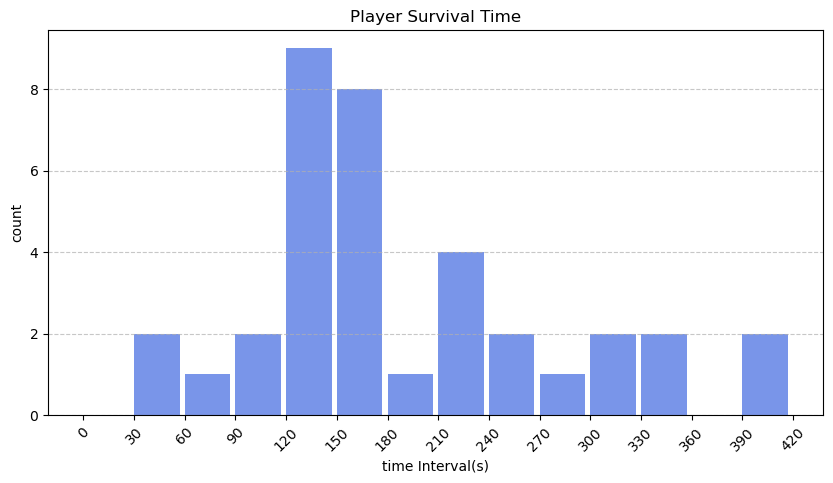

In [65]:
def playerTimeListVisual(data):
    print("Player Survival Time Analysis")
    df = pd.Series(data)
    print(df.describe())
    
    min_time = min(data)
    max_time = max(data)

    bin_size = 30
    bins = np.arange(0, max_time + bin_size, bin_size)

    hist, bin_edges = np.histogram(data, bins)

    plt.figure(figsize=(10, 5))
    plt.bar(bin_edges[:-1], hist, width=bin_size * 0.9, color="royalblue", alpha=0.7, align="edge")
    plt.xlabel("time Interval(s)")
    plt.ylabel("count")
    plt.title("Player Survival Time")
    plt.xticks(bins, rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
playerTimeListVisual(playerTimeList)

Player Score Analysis
count        36.000000
mean     155108.966667
std      210510.387790
min        1640.000000
25%       24449.000000
50%       58345.000000
75%      191487.500000
max      847195.000000
dtype: float64


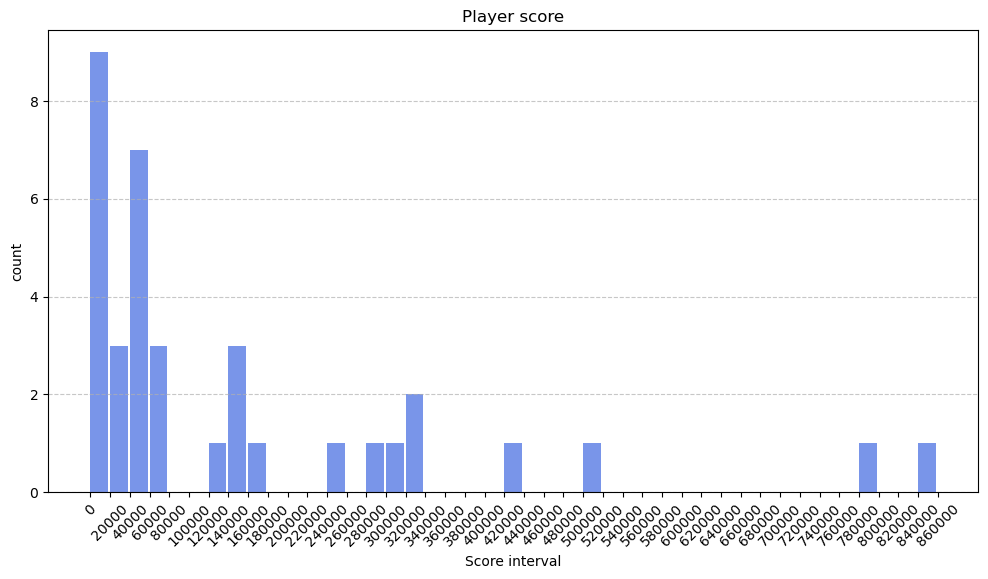

In [66]:
def scoreListVisual(data):
    print("Player Score Analysis")
    df = pd.Series(data)
    print(df.describe())
    
    max_value = max(data)
    bin_size = 20000
    bins = np.arange(0, max_value + bin_size, bin_size)

    hist, bin_edges = np.histogram(data, bins)
    plt.figure(figsize=(12, 6))
    plt.bar(bin_edges[:-1], hist, width=bin_size * 0.9, color="royalblue", alpha=0.7, align="edge")
    plt.xlabel("Score interval")
    plt.ylabel("count")
    plt.title("Player score")
    plt.xticks(bin_edges, rotation=45)  # 旋转 x 轴刻度
    plt.grid(axis="y", linestyle="--", alpha=0.7)  # 添加网格线
    plt.show()
scoreListVisual(scoreList)

Player Score Analysis
count    36.000000
mean     11.916667
std      10.491834
min       1.000000
25%       4.000000
50%       9.000000
75%      14.250000
max      40.000000
dtype: float64


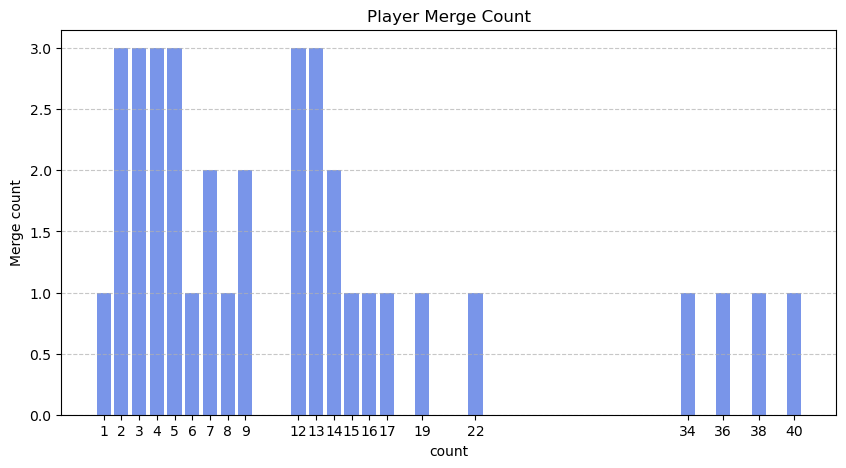

In [72]:
from collections import Counter
data = mergeCountList
print("Player Score Analysis")
df = pd.Series(data)
print(df.describe())
counter = Counter(data)  
x_values = sorted(counter.keys())  # 按大小排序的唯一值
y_values = [counter[x] for x in x_values]  # 计数

# 绘制柱状图
plt.figure(figsize=(10, 5))
plt.bar(x_values, y_values, color="royalblue", alpha=0.7)

# 添加标签和标题
plt.xlabel("count")
plt.ylabel("Merge count")
plt.title("Player Merge Count")

# 设置 x 轴刻度
plt.xticks(x_values)

# 添加网格线（可选）
plt.grid(axis="y", linestyle="--", alpha=0.7)

# 显示图表
plt.show()